In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
from mpl_toolkits.mplot3d import Axes3D

In [22]:
def plot(rs):
    fig=plt.figure(figsize=(18,6))
    ax = fig.add_subplot(111, projection='3d')
    # plot trajectory
    ax.plot(rs[:,0], rs[:,1], rs[:,2], 'k', label = 'trajectory')
    ax.plot([rs[0,0]], [rs[0,1]], [rs[0,2]], 'k*', label = 'initial position')
    
    #plot central body
    _u, _v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    _x = earth_radius*np.cos(_u)*np.sin(_v)
    _y = earth_radius*np.sin(_u)*np.sin(_v)
    _z = earth_radius*np.cos(_v)
    ax.plot_surface(_x,_y,_z, cmap = "Blues")
    
    #plot x, y, z, vectors
    l = earth_radius*2
    x,y,z = [[0,0,0], [0,0,0], [0,0,0]]
    u,v,w = [[1,0,0], [0,1,0], [0,0,1]]
    ax.quiver(x,y,z,u,v,w,color='k')
    
    max_val = np.max(np.abs(rs))
    
    ax.set_xlim([-max_val, max_val])
    ax.set_ylim([-max_val, max_val])
    ax.set_zlim([-max_val, max_val])
    
    ax.set_xlabel(['X (km)'])
    ax.set_ylabel(['Y (km)'])
    ax.set_zlabel(['Z (km)'])
    
    #ax.set_aspect('equal')
    
    ax.set_title('Two Body Visual')
    plt.legend(['Trajectory', 'Initial Position'])
    for ii in range(0,360,1):
        ax.view_init(elev=50,azim=ii)
    
    plt.show()
    
    

earth_radius = 6378.0 #km
earth_mu = 398600.0 #km^3/s^2

def diff_eqn(t, y, mu):
    # unpack the state
    rx, ry, rz, vx, vy, vz = y
    r = np.array([rx, ry, rz])
    
    #norm of radius vector
    norm_r = np.linalg.norm(r)
    
    #two body acceleration
    ax, ay, az = -r*mu/norm_r**3
    
    return [vx,vy,vz, ax, ay, az]
    

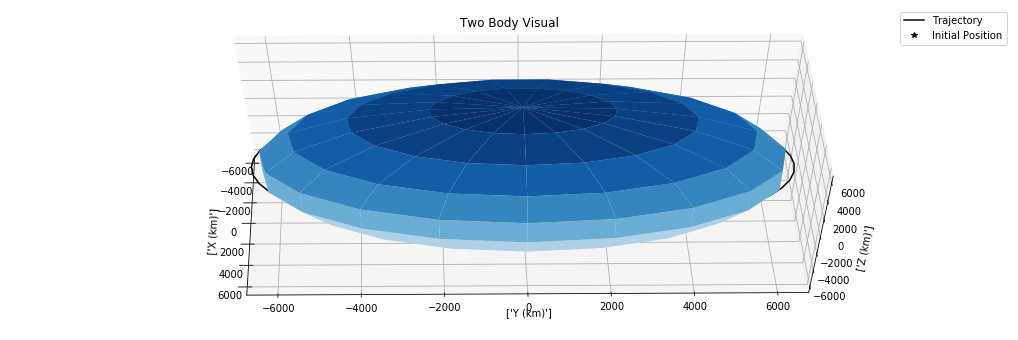

In [23]:
if __name__ == '__main__':
    #initial condition of orbit parameters
    r_mag = earth_radius +100 #km
    v_mag = np.sqrt(earth_mu/r_mag) #km/s
    
    #initial position and velocity vectors
    r0 = [r_mag, 0, 0]
    v0 = [0, v_mag, 0]
    
    #timespane
    tspan = 100*60.0
    
    #timestep
    dt = 100.0
    
    #total number of steps
    n_steps = int(np.ceil(tspan/dt))
    
    #initialize arrays
    ys = np.zeros((n_steps, 6))
    ts = np.zeros((n_steps, 1))
    
    #initial conditions
    y0  = r0+v0
    ys[0] = np.array(y0)
    step=1
    
    #initialize solver
    solver = ode(diff_eqn)
    solver.set_integrator('lsoda')
    solver.set_initial_value(y0, 0)
    solver.set_f_params(earth_mu)
    
    #propogate orbit
    while solver.successful() and step< n_steps:
        solver.integrate(solver.t+dt)
        ts[step] =  solver.t
        ys[step] = solver.y
        step+=1
    rs = ys[:,:3]
    plot(rs)